# Work
試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異  
請嘗試將 BN 放在 Activation 之前，並比較訓練結果  
請於 BN 放在 Input Layer 後，並比較結果  

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for br in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %.6f" % (br))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=br, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-br-%s" % str(br)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0930 17:39:00.751492  5016 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0930 17:39:00.752459  5016 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0930 17:39:00.767456  5016 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0930 17:39:00.768418  5016 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.

Experiment with BATCH_SIZE = 2.000000


W0930 17:39:01.047669  5016 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0930 17:39:01.131446  5016 deprecation.py:323] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 268s 5ms/step - loss: 2.2588 - acc: 0.1469 - val_loss: 2.8101 - val_acc: 0.1388
Epoch 50/50
50000/50000 [==============================] - 268s 5ms/step - loss: 2.2534 - acc: 0.1489 - val_loss: 2.6424 - val_acc: 0.1333
Experiment with BATCH_SIZE = 16.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None,

50000/50000 [==============================] - 33s 669us/step - loss: 1.1073 - acc: 0.6087 - val_loss: 1.3428 - val_acc: 0.5362
Epoch 48/50
50000/50000 [==============================] - 34s 678us/step - loss: 1.1102 - acc: 0.6038 - val_loss: 1.3619 - val_acc: 0.5277
Epoch 49/50
50000/50000 [==============================] - 34s 671us/step - loss: 1.1109 - acc: 0.6074 - val_loss: 1.3657 - val_acc: 0.5213
Epoch 50/50
50000/50000 [==============================] - 35s 690us/step - loss: 1.1043 - acc: 0.6113 - val_loss: 1.3456 - val_acc: 0.5303
Experiment with BATCH_SIZE = 32.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalizati

50000/50000 [==============================] - 18s 367us/step - loss: 0.8340 - acc: 0.7035 - val_loss: 1.6071 - val_acc: 0.4912
Epoch 46/50
50000/50000 [==============================] - 17s 347us/step - loss: 0.8213 - acc: 0.7082 - val_loss: 1.5432 - val_acc: 0.5154
Epoch 47/50
50000/50000 [==============================] - 18s 357us/step - loss: 0.8130 - acc: 0.7105 - val_loss: 1.5173 - val_acc: 0.5202
Epoch 48/50
50000/50000 [==============================] - 17s 347us/step - loss: 0.8062 - acc: 0.7141 - val_loss: 1.5901 - val_acc: 0.4994
Epoch 49/50
50000/50000 [==============================] - 17s 350us/step - loss: 0.8060 - acc: 0.7115 - val_loss: 1.5326 - val_acc: 0.5184
Epoch 50/50
50000/50000 [==============================] - 20s 410us/step - loss: 0.7986 - acc: 0.7150 - val_loss: 1.5711 - val_acc: 0.5061
Experiment with BATCH_SIZE = 128.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   


50000/50000 [==============================] - 7s 140us/step - loss: 0.3435 - acc: 0.8812 - val_loss: 2.3611 - val_acc: 0.4588
Epoch 44/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.3226 - acc: 0.8885 - val_loss: 2.2644 - val_acc: 0.4742
Epoch 45/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.3085 - acc: 0.8944 - val_loss: 2.4212 - val_acc: 0.4667
Epoch 46/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.3142 - acc: 0.8926 - val_loss: 2.4039 - val_acc: 0.4600
Epoch 47/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.3000 - acc: 0.8974 - val_loss: 2.2953 - val_acc: 0.4854
Epoch 48/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.2839 - acc: 0.9034 - val_loss: 2.5008 - val_acc: 0.4506
Epoch 49/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.2800 - acc: 0.9044 - val_loss: 2.4894 - val_acc: 0.4561
Epoch 50/50
50000/50000 [==============

50000/50000 [==============================] - 4s 90us/step - loss: 0.2725 - acc: 0.9193 - val_loss: 2.1938 - val_acc: 0.4805
Epoch 42/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.2661 - acc: 0.9204 - val_loss: 2.2656 - val_acc: 0.4698
Epoch 43/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.2484 - acc: 0.9271 - val_loss: 2.1850 - val_acc: 0.4787
Epoch 44/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.2351 - acc: 0.9326 - val_loss: 2.2854 - val_acc: 0.4719
Epoch 45/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.2283 - acc: 0.9333 - val_loss: 2.4480 - val_acc: 0.4519
Epoch 46/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.2135 - acc: 0.9387 - val_loss: 2.2782 - val_acc: 0.4736
Epoch 47/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.2087 - acc: 0.9388 - val_loss: 2.3311 - val_acc: 0.4737
Epoch 48/50
50000/50000 [=====================

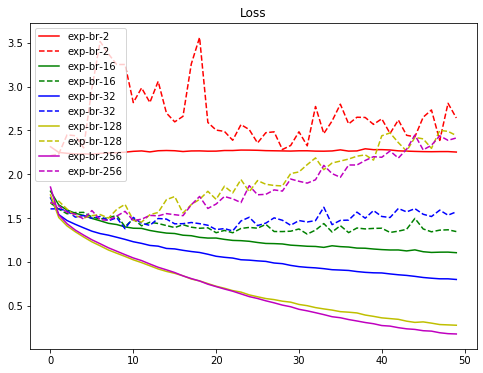

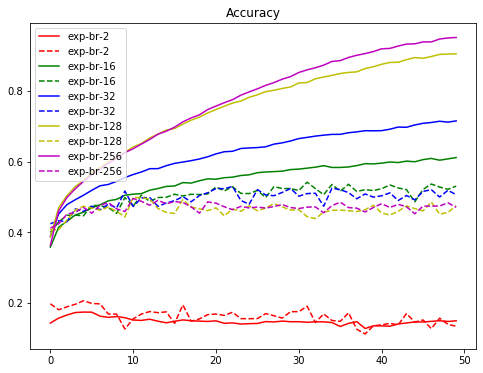

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 10
BATCH_SIZE = [128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for br in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %.6f" % (br))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=br, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-br-%s" % str(br)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0930 22:48:42.491706 14168 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0930 22:48:42.492666 14168 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0930 22:48:42.508656 14168 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0930 22:48:42.509621 14168 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.

Experiment with BATCH_SIZE = 128.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 

W0930 22:48:42.767973 14168 deprecation.py:323] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 184us/step - loss: 1.7647 - acc: 0.3815 - val_loss: 1.6526 - val_acc: 0.4118
Epoch 2/10
50000/50000 [==============================] - 7s 147us/step - loss: 1.4958 - acc: 0.4711 - val_loss: 1.5940 - val_acc: 0.4310
Epoch 3/10
50000/50000 [==============================] - 8s 158us/step - loss: 1.3960 - acc: 0.5091 - val_loss: 1.5346 - val_acc: 0.4615
Epoch 4/10
50000/50000 [==============================] - 7s 145us/step - loss: 1.3225 - acc: 0.5366 - val_loss: 1.4521 - val_acc: 0.4807
Epoch 5/10
50000/50000 [==============================] - 7s 140us/step - loss: 1.2665 - acc: 0.5547 - val_loss: 1.4470 - val_acc: 0.4887
Epoch 6/10
50000/50000 [==============================] - 7s 137us/step - loss: 1.2168 - acc: 0.5738 - val_loss: 1.4906 - val_acc: 0.4745
Epoch 7/10
50000/50000 [==============================] - 7s 142us/step - loss: 1.1714 - acc: 0.5910 - val_loss: 1.4949 - 

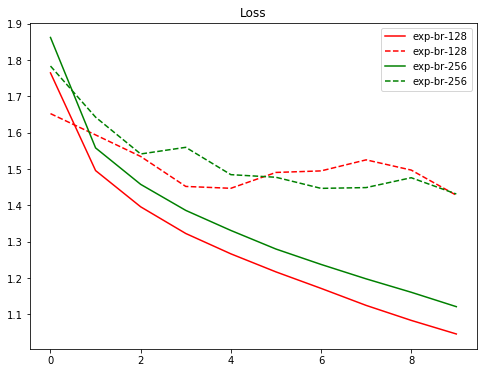

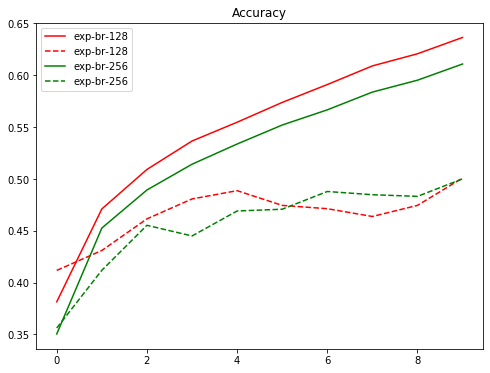

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 10
BATCH_SIZE = [128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for br in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %.6f" % (br))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=br, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-br-%s" % str(br)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0930 23:09:07.199859 14304 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0930 23:09:07.200820 14304 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0930 23:09:07.215781 14304 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0930 23:09:07.216778 14304 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.

Experiment with BATCH_SIZE = 128.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,740,938
Trainable params: 1,739,914
Non-trainable params: 1,024
______________________

W0930 23:09:07.425257 14304 deprecation.py:323] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 184us/step - loss: 1.7710 - acc: 0.3746 - val_loss: 1.6694 - val_acc: 0.4126
Epoch 2/10
50000/50000 [==============================] - 7s 143us/step - loss: 1.5343 - acc: 0.4592 - val_loss: 1.5688 - val_acc: 0.4350
Epoch 3/10
50000/50000 [==============================] - 7s 141us/step - loss: 1.4487 - acc: 0.4897 - val_loss: 1.5854 - val_acc: 0.4423
Epoch 4/10
50000/50000 [==============================] - 7s 138us/step - loss: 1.3905 - acc: 0.5109 - val_loss: 1.5357 - val_acc: 0.4562
Epoch 5/10
50000/50000 [==============================] - 6s 124us/step - loss: 1.3391 - acc: 0.5301 - val_loss: 1.4810 - val_acc: 0.4734
Epoch 6/10
50000/50000 [==============================] - 6s 127us/step - loss: 1.2952 - acc: 0.5456 - val_loss: 1.4480 - val_acc: 0.4841
Epoch 7/10
50000/50000 [==============================] - 7s 131us/step - loss: 1.2510 - acc: 0.5615 - val_loss: 1.4313 - 

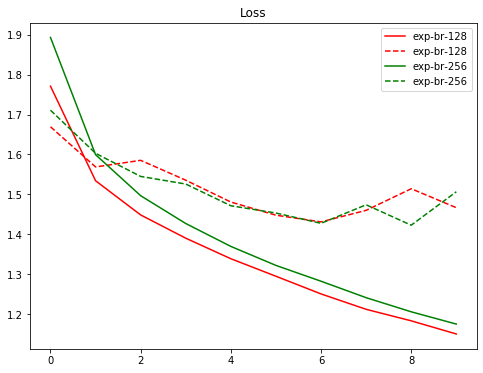

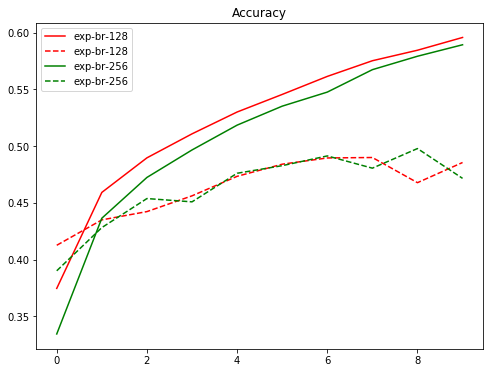

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()